<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> PROGRAMA DE VERÃO FGV EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# This Lab Class requires the file <font color=blue> domicilios-rio2010.csv </font> and  python packages:
- pandas
- numpy
- matplotlib
- sklearn
- mpld3
______
______

## <font color=blue> Principal Component Analysis - PCA </font>

In [13]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

###########
# reading data_frame
###########
df = pd.read_csv('domicilios-rio2010.csv')

print(df.columns)

###########
# cleaning the data (remove rows with NaN)
###########

df.dropna(how='any',inplace=True)

###########
# converting data columns to numpy array
###########

#data = df[['num_Habitantes','AguaADEQUADA', 'EsgotoADEQUADO',
#       'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#       'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia']].values

data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
       'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
       'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia']].values

# data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
#        'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#        'RespRenda_Ate1Sal']].values


Index(['Setor', 'num_Habitantes', 'AguaADEQUADA', 'EsgotoADEQUADO',
       'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
       'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia', 'Classe_Econ'],
      dtype='object')


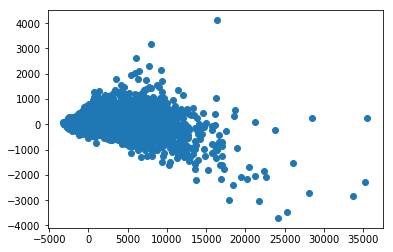

In [14]:
###########
# projecting data in 2D
###########

pca_proj1=PCA(n_components=2)
data_2d=pca_proj1.fit_transform(data)

plt.scatter(data_2d[:,0],data_2d[:,1])

### Outliers hamper PCA analysis

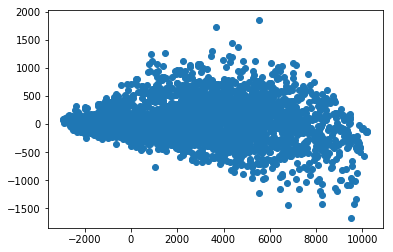

In [15]:
from scipy import stats

###########
# Analyzing and Removing outliers via Z-score method
###########

data_zscore = stats.zscore(data,axis=0)

outliers_ids = np.where(np.abs(data_zscore)>3)[0]
non_outliers_ids = [i for i in range(data.shape[0]) if i not in outliers_ids]
data_filtered = data[non_outliers_ids,:]


pca_proj2=PCA(n_components=2)
data_2d_filtered=pca_proj2.fit_transform(data_filtered)

plt.scatter(data_2d_filtered[:,0],data_2d_filtered[:,1])

[1.14109708e+07 7.43811490e+04 4.06070844e+02 1.90961695e+02
 8.86021695e+01 8.20806928e+01 3.12287169e+01 7.95510502e+00
 4.50205080e+00]
[9.93453641e-01 6.47571752e-03 3.53530446e-05 1.66253683e-05
 7.71381766e-06 7.14604960e-06 2.71881185e-06 6.92581570e-07
 3.91954273e-07]


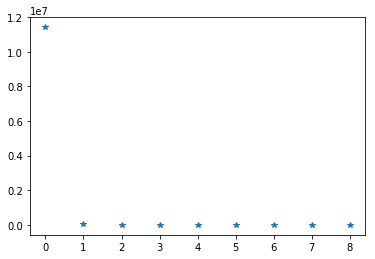

In [16]:
#############
# amount of explained variance original data
#############

data_pca = PCA(svd_solver='full')
#data_pca.fit(data[1:])
data_pca.fit(data)
print(data_pca.explained_variance_)
print(data_pca.explained_variance_ratio_)

plt.plot(data_pca.explained_variance_, '*')

[7.34534064e+06 4.66551784e+04 1.25698030e+02 5.93714865e+01
 4.60231380e+01 6.12716457e+00 4.13887358e+00 2.40760115e+00
 1.39484430e+00]
[9.93655464e-01 6.31137141e-03 1.70040493e-05 8.03159511e-06
 6.22587090e-06 8.28864290e-07 5.59894299e-07 3.25693002e-07
 1.88690318e-07]


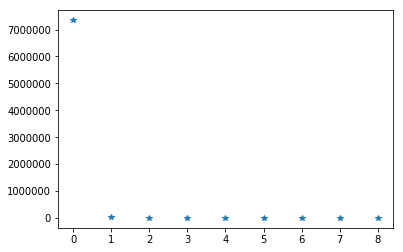

In [17]:
#######
# disregarding the number of habitants
#######

data_filtered_pca = PCA(svd_solver='full')
#data_filtered_pca.fit(data_filtered)
data_filtered_pca.fit(data_filtered[1:])

print(data_filtered_pca.explained_variance_)
print(data_filtered_pca.explained_variance_ratio_)

plt.figure(4)
plt.plot(data_filtered_pca.explained_variance_, '*')

In [18]:
#######
# finding the most relevant attributes
#######

print(np.abs(data_filtered_pca.components_))

[[8.57931502e-05 5.18850936e-04 1.26677356e-03 4.93517368e-05
  2.22324400e-04 4.87377547e-04 3.44405553e-03 3.89407325e-01
  9.21058035e-01]
 [6.97966976e-04 1.30105396e-03 2.45627228e-04 1.04492733e-04
  2.84460076e-04 1.78653166e-04 2.17138326e-03 9.21057857e-01
  3.89416673e-01]
 [4.06099215e-02 2.64911450e-01 7.23045675e-01 2.37935188e-02
  4.85917421e-02 1.17714100e-01 6.23361315e-01 3.06287237e-03
  2.25871042e-03]
 [5.96928780e-02 5.97292700e-01 3.86271032e-01 1.67844356e-02
  1.39027457e-02 3.20156781e-02 6.99263805e-01 1.19585331e-03
  1.25524185e-03]
 [5.67428078e-02 7.51444010e-01 5.65991977e-01 7.93923361e-04
  1.71647428e-03 3.83518178e-03 3.34280866e-01 1.79847234e-03
  1.37346230e-04]
 [9.93708157e-01 9.04632586e-02 2.52346462e-02 4.12787181e-02
  2.12817380e-02 3.88441928e-02 7.59394923e-03 5.27762494e-04
  2.16727197e-04]
 [3.86778382e-02 3.83828542e-03 6.02702828e-02 4.12394060e-03
  8.96238728e-01 4.30833642e-01 7.73193170e-02 1.32318449e-04
  1.08152985e-05]
 [2.94